#Taller N ° 2
###Finanzas computacionales
###Integrantes
####Gabriela Garbiras
####Jimena Ramírez
####Lucía Ramírez

###Grupo
####305I

In [ ]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import linprog
import cvxpy as cp

1- La empresa XYZ produce dos productos: A y B. La ganancia por unidad de A es de 3 dólares y de B es de 5 dólares. Para su producción dispone de 500 unidades de materia prima, 1000 unidades de mano de obra y 2000 dólares de capital, de los cuales se necesitan para producir una unidad de:
##### i) A: una unidad de materia prima, dos unidades de mano de obra y una unidad de capital.
##### ii) B: una unidad de materia prima, cuatro unidades de mano de obra y dos unidades de capital. Además, se necesita producir al menos 100 unidades de A y 150 unidades de B para satisfacer la demanda del mercado.
Encuentre la asignación óptima de A y B que maximizan las ganancias de la empresa. Para ello, formule un problema de LP utilizando Scipy.

In [ ]:
mi # Función objetivo
FO_pt1 = np.array([-3, -5])
# Restricciones
A_1 = np.array([[1, 1], [2, 4], [1, 2]])
b_1 = np.array([500, 1000, 2000])
bounds = ((100, None), (150, None))
# Optimización
Rta_pt1 = linprog(FO_pt1, A_ub=A_1, b_ub=b_1, bounds=bounds)
pd.DataFrame(Rta_pt1.x).T

,0,1
0,200.0,150.0


In [ ]:
# Ganancia total
-Rta_pt1.fun

1350.0

2- Usted desea invertir la suma de $100 millones en cuatro fondos que tienen diferentes retornos esperados (E(R)), así como diferentes ponderaciones en acciones de alto valor, gran tamaño y alta liquidez, como muestra la siguiente tabla:

#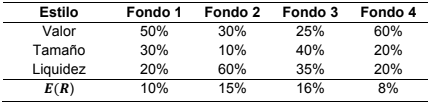

#####La asignación anterior debe contener al menos un 35% de acciones de alto valor, un 30% en tamaño y un 15% de acciones de liquidez. Encuentre una asignación factible con el retorno esperado más alto, bajo el supuesto de que solo se le permite mantener posiciones largas en los fondos.

#####Formule y resuelva el problema de LP considerando las siguientes restricciones:

#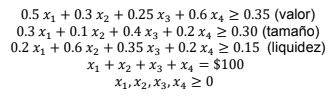

#####Nota: resuelva el problema anterior usando las librerías de Scipy y CVXPY de Python.

In [ ]:
# Libreria scipy
Fun_Obj = np.array([0.10, 0.15, 0.16, 0.08])
Res_1 = np.array([[0.5, 0.3, 0.25, 0.6],[0.3, 0.1, 0.4, 0.2],[0.2, 0.6, 0.35, 0.2]])
Res_2 = np.array([0.35, 0.30, 0.15])
Res_3 = np.array([[1,1,1,1]])
Res_4 = np.array([1])
Rta_pt2 = linprog(-Fun_Obj, A_ub=-Res_1, b_ub=-Res_2, A_eq=Res_3, b_eq=Res_4, method='simplex')
pd.DataFrame(Rta_pt2.x).round(4).T

<ipython-input-4-662a6121a04e>:7: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  Rta_pt2 = linprog(-Fun_Obj, A_ub=-Res_1, b_ub=-Res_2, A_eq=Res_3, b_eq=Res_4, method='simplex')


,0,1,2,3
0,0.0,0.1579,0.5789,0.2632


In [ ]:
# Valor máximo
-Rta_pt2.fun

0.13736842105263158

In [ ]:
# Librería CVXPY
n = 4
x = cp.Variable(n)
objetivo = cp.Minimize(-Fun_Obj.T@x)
restricciones = [Res_1 @ x >= Res_2, cp.sum(x) == 1, x >= 0]
prob = cp.Problem(objetivo, restricciones)
prob.solve()
Rta_pt2_2= x.value
print(round(pd.DataFrame(Rta_pt2_2).T,4))

     0       1       2       3
0  0.0  0.1579  0.5789  0.2632


3- La empresa XYZ se enfrente al siguiente problema de manejo de efectivo. Las cifras están expresadas en millones ($).

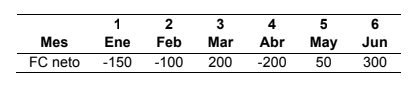

Además, se sabe que la empresa cuenta con las siguientes fuentes de recursos:


*   Una línea de crédito de hasta $100 a una tasa de interés del 1% mensual.
*   Puede emitir papel comercial a 90 días con un interés total del 2% por un período de 3 meses.
*   Todos los meses se pueden invertir los fondos sobrantes a una tasa de interés del 0,3% mensual. Por ejemplo, la empresa podría hacer un depósito bancario que le reconoce esa tasa.

Sobre este problema, la empresa desea saber si: ¿usar la línea de crédito en algunos de los meses le representa un alto costo? si es así ¿cuándo debería usarla? ¿cuánto cuesta? ¿qué pagos de intereses tendrá que hacer entre enero y junio? etc... Para responder a estos interrogantes, la empresa puede formular y resolver un problema de LP. 

Para la formulación del problema tener en cuenta lo siguiente:

**Variables:**

x_j: monto dispuesto a pedir en la línea de crédito en el mes j, para j = 1,2,3,4,5.

y_j: monto emitido en el papel comercial en el mes j, para j = 1,2,3.

z_j: saldo de fondos (FC) en el mes j, para j = 1,2,3,4,5,6.

**Objetivo:** 

Maximizar el saldo de los fondos (FC) en el mes 6 (Jun):

máx z_6

**Restricciones:**

Restricciones de los saldos en cada mes y límites en xj, yj y zj

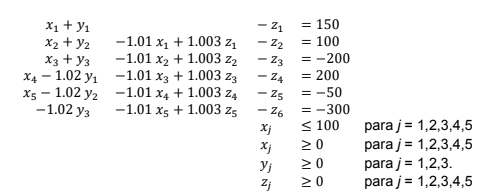

Nota: resuelva el problema anterior usando las librerías de Scipy y CVXPY de Python.

In [ ]:
# Libreria Scipy
Fun_objetivo = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
Res_1_3 = np.array([[1, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, 0, 0, 0],
                    [-1.01, 1, 0, 0, 0, 0, 1, 0, 1.003, -1, 0, 0, 0, 0],
                    [0, -1.01, 1, 0, 0, 0, 0, 1, 0, 1.003, -1, 0, 0, 0],
                    [0, 0, -1.01, 1, 0, -1.02, 0, 0, 0, 0, 1.003, -1, 0, 0],
                    [0, 0, 0, -1.01, 1 ,0, -1.02, 0, 0, 0, 0, 1.003, -1, 0],
                    [0, 0, 0, 0, -1.01, 0, 0, -1.02, 0, 0, 0, 0, 1.003, -1]])

Res_2_3 = np.array([150, 100, -200, 200, -50, -300])

Rta_pt3 = linprog(-Fun_objetivo, A_eq = Res_1_3, b_eq = Res_2_3, method = 'simplex')
pd.DataFrame(Rta_pt3.x).round(2).T

# La entrada 0,1 del DataFrame se refiere al crédito en el mes 2
# Las entradas 0.5, 0.6 y 0.7 se refieren a los bonos en los meses 1, 2 y 3
# La entrada 0,10 se refiere al excedente
# La entrada 0,13 se refiere a la maximización

<ipython-input-32-c8bfc71136ca>:12: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  Rta_pt3 = linprog(-Fun_objetivo, A_eq = Res_1_3, b_eq = Res_2_3, method = 'simplex')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,50.98,0.0,0.0,0.0,150.0,49.02,203.43,0.0,0.0,351.94,0.0,0.0,92.5


In [ ]:
# Librería CVXPY
n = 14
x = cp.Variable(n)
objetivo_3 = cp.Minimize(-Fun_objetivo.T@x)
restricciones_3 = [Res_1_3 @ x == Res_2_3, x >= 0]
prob = cp.Problem(objetivo_3, restricciones_3)
prob.solve()
Rta_pt3_2= x.value
print(round(pd.DataFrame(Rta_pt3_2).T,2))

# Para el crédito se puede solicitar 42,69 en el mes 2 y en el mes 5 8,46

    0      1    2    3     4      5      6       7    8    9       10   11  \
0  0.0  42.69  0.0  0.0  8.46  150.0  57.31  195.06  0.0  0.0  351.94  0.0   

    12    13  
0  0.0  92.5  


4- La empresa XYZ desea encontrar el saldo óptimo que debe mantener en su cuenta bancaria en un horizonte de un mes buscando maximizar su rentabilidad total. Se sabe que la empresa espera recibir entradas de efectivo de: 500 dólares en la primera semana, 300 dólares en la segunda semana, 200 dólares en la tercera semana y $400 en la cuarta semana. Todas las cifras se encuentran en millones de pesos. Además, la empresa debe realizar los siguientes pagos durante el mes: 350 dólares en la primera semana, 400 dólares en la segunda semana, 250 dólares en la tercera semana y 200 dólares en la cuarta semana y, para ello, debe mantener un saldo suficiente que respalde estas obligaciones.

Para aprovechar la rentabilidad que ofrecen los saldos en cada momento, la empresa puede invertir sus recursos en un instrumento a corto plazo en el que recibe un rendimiento del 0,02% por día, pero al realizar esta operación debe incurrir en un costo de transacción del 0,01% del monto transferido.

Formule un problema de LP utilizando Scipy que le permita maximizar la rentabilidad total de los saldos en su cuenta teniendo en cuenta las restricciones de sus flujos de efectivo.

In [ ]:
# Función objetivo
FO = np.array([0, 0, 0, 0, 0, 0, 0, 1])
# Restricciones
Rn_4 = (1+0.0001)**7
A_4 = np.array([[1, 0, 0, 0, -1, 0, 0, 0], 
                [0, 1, 0, 0, Rn_4, -1, 0, 0], 
                [0, 0, 1, 0, 0, Rn_4, -1, 0], 
                [0, 0, 0, 1, 0, 0, Rn_4, -1]])
b_4 = np.array([[150, -100, -50, 200]])
# Función de optimización
Rta_pt4 = linprog(-FO, A_ub=A_4, b_ub=-b_4, method='simplex')
Val_opti = pd.DataFrame(Rta_pt4.x).T
Val_opti.round(2)

<ipython-input-39-d38141adc54f>:11: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  Rta_pt4 = linprog(-FO, A_ub=A_4, b_ub=-b_4, method='simplex')


,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,150.0,50.11,0.14,200.14


In [ ]:
# Valor Máximo
-Rta_pt4.fun

200.14021366142958

5- La empresa XYZ tiene que decidir como distribuye su presupuesto $10.000 millones y la mano de obra (horas de trabajo) en tres departamentos: ventas, marketing y producción buscando maximizar sus ganancias. Para ello, se sabe que cada departamento le proporciona a la empresa las siguientes ganancias: ventas: 5 dólares, marketing: 8 dólares, y producción: 10 dólares. Esta asignación debe cumplir las siguientes restricciones:

i. El total de horas de trabajo disponibles es de 1.000.

ii. El departamento de ventas debe recibir al menos el 20% del presupuesto total.

iii. El departamento de marketing debe recibir al menos el 30% del total de horas de trabajo disponibles.

iv. El departamento de producción debe recibir al menos el 25% del total de horas de trabajo disponibles.

Formule un problema de LP utilizando Scipy que le permita maximizar

In [ ]:
# Función objetivo
Func_objet = np.array([0, 0, 0, 5, 8, 10])
# Restricciones
A_5 = np.array([[0, 0, 0, 1, 0, 0],
                [0, 1, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0],
                [0, 0, 0, 0, 1, 0],
                [0, 0, 0, 0, 0, 1]])
b_5 = np.array([2000, 300, 250, 2000, 2000])
A_5_2 = np.array([[1, 1, 1, 0, 0, 0],
                  [0, 0, 0, 1, 1, 1]])
b_5_2 = np.array([1000, 10000])
# RTA
Rta_pt5 = linprog(-Func_objet, A_ub = -A_5, b_ub = -b_5, A_eq = A_5_2, b_eq = b_5_2, method = 'simplex')
pd.DataFrame(Rta_pt5.x).round(4).T

# El presupuesto asignado es de $2000 para las ventas, $2000 para marketing y $6000 para producción
# La distribución de horas es: 450 h para ventas, 300 h para marketing y 250 h para producción

<ipython-input-41-a279d9a295d1>:14: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  Rta_pt5 = linprog(-Func_objet, A_ub = -A_5, b_ub = -b_5, A_eq = A_5_2, b_eq = b_5_2, method = 'simplex')


,0,1,2,3,4,5
0,450.0,300.0,250.0,2000.0,2000.0,6000.0


In [ ]:
# Valor maximizado
-Rta_pt5.fun

86000.0

6- Considere una empresa con tres puntos potenciales para ubicar sus instalaciones (J ={1,2,3}) y cinco puntos de demanda que debe satisfacer (I = {1,2,3,4,5}). La apertura del punto j ∈ J tiene un costo fijo de funcionamiento fj, independientemente del volumen de ventas que maneje. Este volumen está limitado a una determinada cantidad máxima que puede manejarse anualmente (Mj). Además, hay un costo de transporte cij para ir desde el punto j para abastecer la demanda en el punto i. Las siguientes tablas muestran los datos de demanda en cada punto:

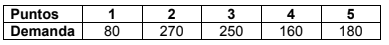

Y los costos de transporte, de funcionamiento y cantidad máxima que puede mantener en cada

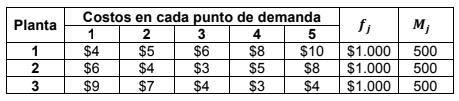

Las columnas 1-5 muestran el costo de transporte desde cada punto instalado (planta) a cada demanda que debe satisfacer. Las columnas fj y Mj muestran los costos fijos y la capacidad máxima en cada ubicación. Encuentre la ubicación óptima para satisfacer las demandas de tal forma que se minimicen los costos.

Formule un problema de optimización utilizando Scipy que le permita encontrar la estrategia optima de la empresa para reducir sus costos de funcionamiento y transporte.

In [ ]:
# Función objetivo
Función_Objetivo_6 = np.array([[4, 5, 6, 8, 10],
                               [6, 4, 3, 5, 8],
                               [9, 7, 4, 3, 4]])
# Restricciones
MA_6 = np.array([500, 500, 500])
dem_6 = np.array([80, 270, 250, 160, 180])
x_pt6 = cp.Variable((3, 5), nonneg=True)
matriz = np.array([1000, 1000, 1000])
cy_pt6 = cp.Variable(3, boolean = True)
Objetivo_6 = cp.Minimize(cp.sum(cp.multiply(Función_Objetivo_6, x_pt6)))
Restricciones_6 = [cp.sum(x_pt6, axis=1)<= MA_6 @ cy_pt6, cp.sum(x_pt6, axis=0)==dem_6, cp.sum(cy_pt6*MA_6) >= cp.sum(dem_6)]

# Optimización
Rta_pt6 = cp.Problem(Objetivo_6, Restricciones_6)
Rta_pt6.solve()
print(round(pd.DataFrame(x_pt6.value),4))
cy_pt6.value

      0      1      2      3      4
0  80.0   -0.0   -0.0   -0.0   -0.0
1  -0.0  270.0  250.0   -0.0   -0.0
2  -0.0   -0.0   -0.0  160.0  180.0


/usr/local/lib/python3.9/dist-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


array([1., 1., 0.])